##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# はじめてのニューラルネットワーク：分類問題の初歩

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: これらのドキュメントは私たちTensorFlowコミュニティが翻訳したものです。コミュニティによる 翻訳は**ベストエフォート**であるため、この翻訳が正確であることや[英語の公式ドキュメント](https://www.tensorflow.org/?hl=en)の 最新の状態を反映したものであることを保証することはできません。 この翻訳の品質を向上させるためのご意見をお持ちの方は、GitHubリポジトリ[tensorflow/docs](https://github.com/tensorflow/docs)にプルリクエストをお送りください。 コミュニティによる翻訳やレビューに参加していただける方は、 [docs-ja@tensorflow.org メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ja)にご連絡ください。

このガイドでは、スニーカーやシャツなど、身に着けるものの写真を分類するニューラルネットワークのモデルを訓練します。すべての詳細を理解できなくても問題ありません。TensorFlowの全体を早足で掴むためのもので、詳細についてはあとから見ていくことになります。

このガイドでは、TensorFlowのモデルを構築し訓練するためのハイレベルのAPIである [tf.keras](https://www.tensorflow.org/guide/keras)を使用します。

In [1]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## ファッションMNISTデータセットのロード

このガイドでは、[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)を使用します。Fashion MNISTには10カテゴリーの白黒画像70,000枚が含まれています。それぞれは下図のような1枚に付き1種類の衣料品が写っている低解像度（28×28ピクセル）の画像です。

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNISTは、画像処理のための機械学習での"Hello, World"としてしばしば登場する[MNIST](http://yann.lecun.com/exdb/mnist/) データセットの代替として開発されたものです。MNISTデータセットは手書きの数字（0, 1, 2 など）から構成されており、そのフォーマットはこれから使うFashion MNISTと全く同じです。

Fashion MNISTを使うのは、目先を変える意味もありますが、普通のMNISTよりも少しだけ手応えがあるからでもあります。どちらのデータセットも比較的小さく、アルゴリズムが期待したとおりに機能するかどうかを確かめるために使われます。プログラムのテストやデバッグのためには、よい出発点になります。

ここでは、60,000枚の画像を訓練に、10,000枚の画像を、ネットワークが学習した画像分類の正確性を評価するのに使います。TensorFlowを使うと、下記のようにFashion MNISTのデータを簡単にインポートし、ロードすることが出来ます。

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


ロードしたデータセットは、NumPy配列になります。

* `train_images` と `train_labels` の2つの配列は、モデルの訓練に使用される**訓練用データセット**です。
* 訓練されたモデルは、 `test_images` と `test_labels` 配列からなる**テスト用データセット**を使ってテストします。

画像は28×28のNumPy配列から構成されています。それぞれのピクセルの値は0から255の間の整数です。**ラベル**（label）は、0から9までの整数の配列です。それぞれの数字が下表のように、衣料品の**クラス**（class）に対応しています。

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

画像はそれぞれ単一のラベルに分類されます。データセットには上記の**クラス名**が含まれていないため、後ほど画像を出力するときのために、クラス名を保存しておきます。

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データの観察

モデルの訓練を行う前に、データセットのフォーマットを見てみましょう。下記のように、訓練用データセットには28×28ピクセルの画像が60,000枚含まれています。

In [6]:
train_images.shape

(60000, 28, 28)

同様に、訓練用データセットには60,000個のラベルが含まれます。

In [7]:
len(train_labels)

60000

ラベルはそれぞれ、0から9までの間の整数です。

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

テスト用データセットには、10,000枚の画像が含まれます。画像は28×28ピクセルで構成されています。

In [9]:
test_images.shape

(10000, 28, 28)

テスト用データセットには10,000個のラベルが含まれます。

In [10]:
len(test_labels)

10000

## データの前処理

ネットワークを訓練する前に、データを前処理する必要があります。最初の画像を調べてみればわかるように、ピクセルの値は0から255の間の数値です。

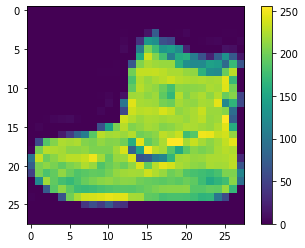

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

ニューラルネットワークにデータを投入する前に、これらの値を0から1までの範囲にスケールします。そのためには、画素の値を255で割ります。

**訓練用データセット**と**テスト用データセット**は、同じように前処理することが重要です。

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**訓練用データセット**の最初の25枚の画像を、クラス名付きで表示してみましょう。ネットワークを構築・訓練する前に、データが正しいフォーマットになっていることを確認します。

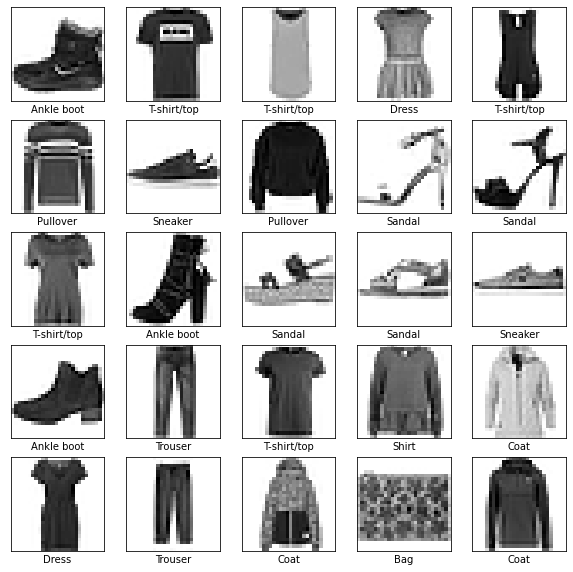

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築

ニューラルネットワークを構築するには、まずモデルの階層を定義し、その後モデルをコンパイルします。

### 層の設定

ニューラルネットワークを形作る基本的な構成要素は**層**（layer）です。層は、入力されたデータから「表現」を抽出します。それらの「表現」は、今取り組もうとしている問題に対して、より「意味のある」ものであることが期待されます。

ディープラーニングモデルのほとんどは、単純な層の積み重ねで構成されています。`tf.keras.layers.Dense` のような層のほとんどには、訓練中に学習されるパラメータが存在します。

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

このネットワークの最初の層は、`tf.keras.layers.Flatten` です。この層は、画像を（28×28ピクセルの）2次元配列から、28×28＝784ピクセルの、1次元配列に変換します。この層が、画像の中に積まれているピクセルの行を取り崩し、横に並べると考えてください。この層には学習すべきパラメータはなく、ただデータのフォーマット変換を行うだけです。

ピクセルが１次元化されたあと、ネットワークは2つの `tf.keras.layers.Dense` 層となります。これらの層は、密結合あるいは全結合されたニューロンの層となります。最初の  `Dense`  層には、128個のノード（あるはニューロン）があります。最後の層でもある2番めの層は、10ノードの**softmax**層です。この層は、合計が1になる10個の確率の配列を返します。それぞれのノードは、今見ている画像が10個のクラスのひとつひとつに属する確率を出力します。

### モデルのコンパイル

モデルが訓練できるようになるには、いくつかの設定を追加する必要があります。それらの設定は、モデルの**コンパイル**(compile）時に追加されます。

* **損失関数**（loss function） —訓練中にモデルがどれくらい正確かを測定します。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。
* **オプティマイザ**（optimizer）—モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定します。
* **メトリクス**（metrics） —訓練とテストのステップを監視するのに使用します。下記の例では*accuracy* （正解率）、つまり、画像が正しく分類された比率を使用しています。

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## モデルの訓練

ニューラルネットワークの訓練には次のようなステップが必要です。

1. モデルに訓練用データを投入します—この例では `train_images` と `train_labels` の２つの配列です。
2. モデルは、画像とラベルの対応関係を学習します。
3. モデルにテスト用データセットの予測（分類）を行わせます—この例では `test_images` 配列です。その後、予測結果と `test_labels` 配列を照合します。 

訓練を開始するには、`model.fit` メソッドを呼び出します。モデルを訓練用データに "fit"（適合）させるという意味です。

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5044 - accuracy: 0.8226
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3152 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2972 - accuracy: 0.8909


モデルの訓練の進行とともに、損失値と正解率が表示されます。このモデルの場合、訓練用データでは0.88（すなわち88%）の正解率に達します。

## 正解率の評価

次に、テスト用データセットに対するモデルの性能を比較します。

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3599 - accuracy: 0.8719

Test accuracy: 0.8719000220298767


ご覧の通り、テスト用データセットでの正解率は、訓練用データセットでの正解率よりも少し低くなります。この訓練時の正解率とテスト時の正解率の差は、**過学習**（over fitting）の一例です。過学習とは、新しいデータに対する機械学習モデルの性能が、訓練時と比較して低下する現象です。

## 予測する

モデルの訓練が終わったら、そのモデルを使って画像の分類予測を行うことが出来ます。

In [18]:
predictions = model.predict(test_images)

これは、モデルがテスト用データセットの画像のひとつひとつを分類予測した結果です。最初の予測を見てみましょう。

In [19]:
predictions[0]

array([1.0235066e-05, 4.3733298e-06, 2.0110505e-07, 7.8010220e-07,
       2.4572078e-06, 1.5979519e-02, 7.2635307e-06, 9.7757004e-02,
       2.9565494e-05, 8.8620859e-01], dtype=float32)

予測結果は、10個の数字の配列です。これは、その画像が10の衣料品の種類のそれぞれに該当するかの「確信度」を表しています。どのラベルが一番確信度が高いかを見てみましょう。

In [20]:
np.argmax(predictions[0])

9

というわけで、このモデルは、この画像が、アンクルブーツ、`class_names[9]` である可能性が最も高いと判断したことになります。これが正しいかどうか、テスト用ラベルを見てみましょう。

In [21]:
test_labels[0]

9

10チャンネルすべてをグラフ化してみることができます。

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0番目の画像と、予測、予測配列を見てみましょう。

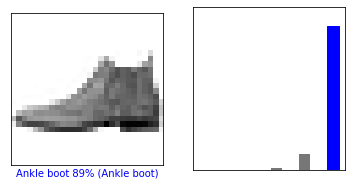

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

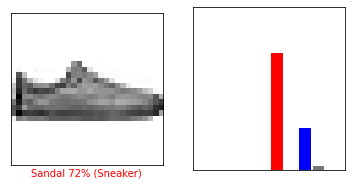

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

予測の中のいくつかの画像を、予測値とともに表示してみましょう。正しい予測は青で、誤っている予測は赤でラベルを表示します。数字は予測したラベルのパーセント（100分率）を示します。自信があるように見えても間違っていることがあることに注意してください。

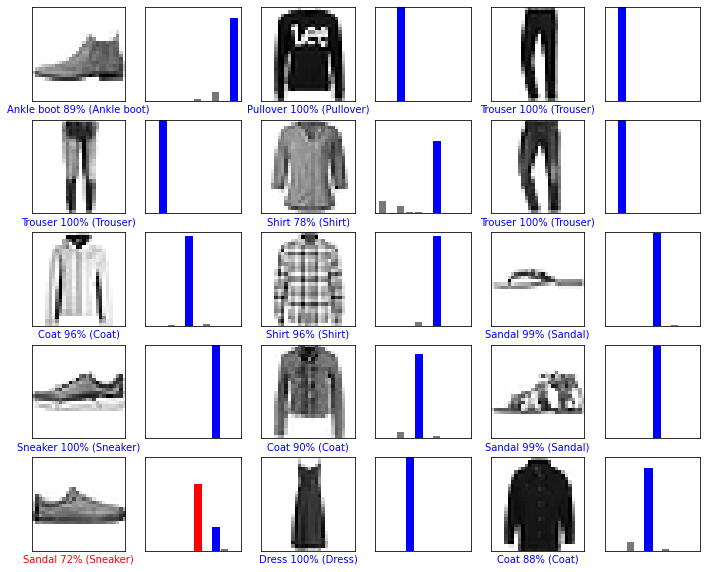

In [25]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

最後に、訓練済みモデルを使って1枚の画像に対する予測を行います。

In [26]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` モデルは、サンプルの中の**バッチ**（batch）あるいは「集まり」について予測を行うように作られています。そのため、1枚の画像を使う場合でも、リスト化する必要があります。

In [27]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


そして、予測を行います。

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0235056e-05 4.3733294e-06 2.0110504e-07 7.8010288e-07 2.4572098e-06
  1.5979517e-02 7.2635303e-06 9.7757086e-02 2.9565432e-05 8.8620853e-01]]


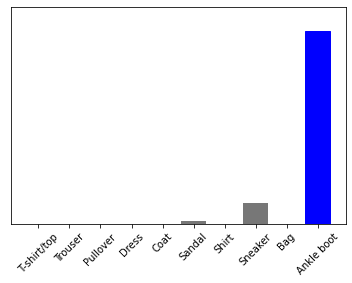

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` メソッドの戻り値は、リストのリストです。リストの要素のそれぞれが、バッチの中の画像に対応します。バッチの中から、（といってもバッチの中身は１つだけですが）予測を取り出します。

In [30]:
np.argmax(predictions_single[0])

9

というわけで、モデルは9というラベルを予測しました。